# Nursing_Home_Case_Study


After plenty of isolated successes, the question isn't what good nursing homes look like, but how to transform existing facilities into places that look like them.Nursing home can provide many benefits for residents, including a safe living environment and round-the-clock care. This allows seniors to receive high-quality health care without burdening their families.

Nursing homes with higher staffing levels of registered nurses (RNs) did better at controlling the coronavirus and reducing death, research from early in the pandemic shows. In a study looking at COVID cases in March and April among 215 Connecticut facilities, for those that had at least one positive case, every additional 20 minutes of RN coverage correlated to a 22 percent decline in cases, according to researchers at the University of Rochester Medical Center.
 A study in California reached similar conclusions. But federal laws and regulations only require nursing homes to employ an RN for eight consecutive hours a day. That can leave 16 hours with no RN coverage. Federal law also allows states to grant waivers to nursing homes that can't meet the regulations.

Regulations for RN staffing were put in place as part of the Nursing Home Reform Act of 1987, in response to a congressional study that found that many older Americans were receiving poor medical attention in long-term care and that some suffered from neglect and abuse. Richard Mollot, executive director of the Long Term Care Community Coalition, says the pandemic has exposed even more problems than that study did, so he is hopeful that lawmakers will be inspired to new action.



# The Data Science Method


Table of Contents

  1. Problem Identification

  2. Data Wrangling

. Data Collection

   . Locating the data

   . Data loading

   . Data joining

. Data Organization

   . File structure

   . Git & Github

. Data Definition

   . Column names

   . Data types (numeric, categorical, timestamp, etc.)

   . Description of the columns

   . Count or percent per unique values or codes (including NA)

   . The range of values or codes

. Data Cleaning

   . NA or missing data

   . Duplicates

3. Exploratory Data Analysis

  . Build data profile tables and plots
        . Outliers & Anomalies
        . Explore data relationships
        . Identification and creation of features

4. Pre-processing and Training Data Development

   . Create dummy or indicator features for categorical variables
   . Standardize the magnitude of numeric features
   . Split into testing and training datasets
   . Apply scaler to the testing set

5. Modeling

   . Fit Models with Training Data Set
   . Review Model Outcomes — Iterate over additional models as needed.
   . Identify the Final Model

6. Documentation

   . Review the Results
   . Present and share your findings - storytelling
   . Finalize Code
   . Finalize Documentation


 



# Data Collection

In [53]:
import pandas as pd

In [54]:
#Loading the datasets

payroll_non_nursing_staff = pd.read_csv('Ensign Healthcare/78y2-smqp.csv')
payroll_nursing_staff = pd.read_csv('Ensign Healthcare/2qky-49qq.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
payroll_non_nursing_staff.head()

,provnum,provname,city,state,county_name,county_fips,cy_qtr,workdate,mdscensus,hrs_admin,...,hrs_othactv_ctr,hrs_qualsocwrk,hrs_qualsocwrk_emp,hrs_qualsocwrk_ctr,hrs_othsocwrk,hrs_othsocwrk_emp,hrs_othsocwrk_ctr,hrs_mhsvc,hrs_mhsvc_emp,hrs_mhsvc_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200701.0,47.0,14.75,...,0.0,8.0,8.0,0.0,9.25,9.25,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200702.0,47.0,4.50,...,0.0,0.0,0.0,0.0,8.50,8.50,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200703.0,47.0,11.50,...,0.0,0.0,0.0,0.0,7.75,7.75,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200704.0,47.0,14.40,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200705.0,47.0,0.00,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [56]:
payroll_nursing_staff.head()

,provnum,provname,city,state,county_name,county_fips,cy_qtr,workdate,mdscensus,hrs_rndon,...,hrs_lpn_ctr,hrs_cna,hrs_cna_emp,hrs_cna_ctr,hrs_natrn,hrs_natrn_emp,hrs_natrn_ctr,hrs_medaide,hrs_medaide_emp,hrs_medaide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200701.0,47.0,8.00,...,0.0,119.96,119.96,0.00,7.75,7.75,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200702.0,47.0,7.50,...,0.0,139.08,131.58,7.50,7.75,7.75,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200703.0,47.0,14.75,...,0.0,130.28,122.78,7.50,0.00,0.00,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200704.0,47.0,0.00,...,0.0,120.33,120.33,0.00,0.00,0.00,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59.0,2020Q3,20200705.0,47.0,0.00,...,0.0,117.00,109.25,7.75,7.75,7.75,0.0,0.0,0.0,0.0


In [57]:
payroll_nursing_staff.describe().T

,count,mean,std,min,25%,50%,75%,max
county_fips,260802.0,6.563374e+01,57.816929,1.0,1.900000e+01,59.00,97.00,321.00
workdate,260802.0,2.020081e+07,81.696912,20200701.0,2.020072e+07,20200815.00,20200907.00,20200930.00
mdscensus,260802.0,8.071266e+01,37.755488,1.0,5.400000e+01,77.00,100.00,377.00
hrs_rndon,260802.0,5.231984e+00,4.490365,0.0,0.000000e+00,8.00,8.00,40.00
hrs_rndon_emp,260802.0,5.156221e+00,4.471517,0.0,0.000000e+00,8.00,8.00,40.00
hrs_rndon_ctr,260802.0,7.576361e-02,0.833718,0.0,0.000000e+00,0.00,0.00,25.92
hrs_rnadmin,260802.0,1.188453e+01,15.902060,0.0,0.000000e+00,8.00,16.53,425.50
hrs_rnadmin_emp,260802.0,1.171990e+01,15.831573,0.0,0.000000e+00,8.00,16.33,425.50
hrs_rnadmin_ctr,260802.0,1.646258e-01,1.193739,0.0,0.000000e+00,0.00,0.00,40.00
hrs_rn,260802.0,3.822905e+01,33.713389,0.0,1.625000e+01,30.85,50.75,782.75


View statistical properties of dataset

In [58]:
payroll_non_nursing_staff.describe().T

,count,mean,std,min,25%,50%,75%,max
county_fips,33171.0,5.356254e+01,41.391583,1.0,13.0,47.00,8.900000e+01,220.00
workdate,33171.0,2.020081e+07,81.693552,20200701.0,20200723.0,20200815.00,2.020091e+07,20200930.00
mdscensus,33171.0,8.109846e+01,36.386158,4.0,55.0,76.00,1.030000e+02,218.00
hrs_admin,33171.0,1.144633e+01,18.432912,0.0,0.0,8.00,8.000000e+00,213.03
hrs_admin_emp,33171.0,1.136305e+01,18.463912,0.0,0.0,8.00,8.000000e+00,213.03
hrs_admin_ctr,33171.0,8.328058e-02,0.864260,0.0,0.0,0.00,0.000000e+00,14.50
hrs_meddir,33171.0,4.589367e-01,1.575497,0.0,0.0,0.00,0.000000e+00,32.25
hrs_meddir_emp,33171.0,9.211058e-02,0.775319,0.0,0.0,0.00,0.000000e+00,12.00
hrs_meddir_ctr,33171.0,3.668261e-01,1.395941,0.0,0.0,0.00,0.000000e+00,32.25
hrs_othmd,33171.0,1.914697e-01,1.467681,0.0,0.0,0.00,0.000000e+00,27.80


Important points to note

- The above command df_payroll.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.
- If we want to view the statistical properties of character variables, we should run the following command -
  df_payroll.describe(include=['object'])`
- If we want to view the statistical properties of all the variables, we should run the following command -
  df_payroll.describe(include='all')`

I should concat nursing_staff and non_nursing staff together.

In [59]:
#We will combine both.

df_payroll = pd.concat([payroll_nursing_staff, payroll_non_nursing_staff])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
df_payroll.head(107)

,city,county_fips,county_name,cy_qtr,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,...,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,provname,provnum,state,workdate
0,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200701.0
1,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200702.0
2,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200703.0
3,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200704.0
4,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200705.0
5,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200706.0
6,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200707.0
7,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,"BURNS NURSING HOME, INC.",15009,AL,20200708.0
8,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,"BURNS NURSING HOME, INC.",15009,AL,20200709.0
9,RUSSELLVILLE,59.0,Franklin,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,45.0,"BURNS NURSING HOME, INC.",15009,AL,20200710.0


I have a lot of missing values and should fill them with (0).replacing missing vaklues with 0, which works well with regression models and standardized variables.

In [61]:
df_payroll.fillna(0, inplace=True)

In [62]:
df_payroll['workdate'] = pd.to_datetime(df_payroll['workdate'])
df_payroll['day_of_week'] = df_payroll['workdate'].dt.day_name()
df_payroll.head()

,city,county_fips,county_name,cy_qtr,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,...,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,provname,provnum,state,workdate,day_of_week
0,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,1970-01-01 00:00:00.020200701,Thursday
1,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,1970-01-01 00:00:00.020200702,Thursday
2,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,1970-01-01 00:00:00.020200703,Thursday
3,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,1970-01-01 00:00:00.020200704,Thursday
4,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,1970-01-01 00:00:00.020200705,Thursday


In [63]:
df_payroll['day_of_week'].unique()

array(['Thursday'], dtype=object)

In [64]:
dg = df_payroll.groupby(["state"])["hrs_np"].mean().reset_index(name="avg_hrs_np")

avg_list = ["hrs_lpn", "hrs_rn","hrs_cna", "hrs_np","hrs_feedasst"]

for item in avg_list:
    dummy = df_payroll.groupby(["state"])[item].mean().reset_index(name="avg_"+item)
    dg=pd.merge(dg, dummy, on=["state"])


In [65]:
dg.head()

,state,avg_hrs_np_x,avg_hrs_lpn,avg_hrs_rn,avg_hrs_cna,avg_hrs_np_y,avg_hrs_feedasst
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AK,0.309179,11.956202,33.061558,92.919879,0.309179,0.000000
2,AL,0.188513,39.187327,17.150798,99.835361,0.188513,2.707554
3,AR,0.000000,67.903144,14.975236,178.471046,0.000000,0.000000
4,AZ,0.047591,38.016833,20.268037,83.050365,0.047591,0.248534


In [66]:
dg.shape

(14, 7)

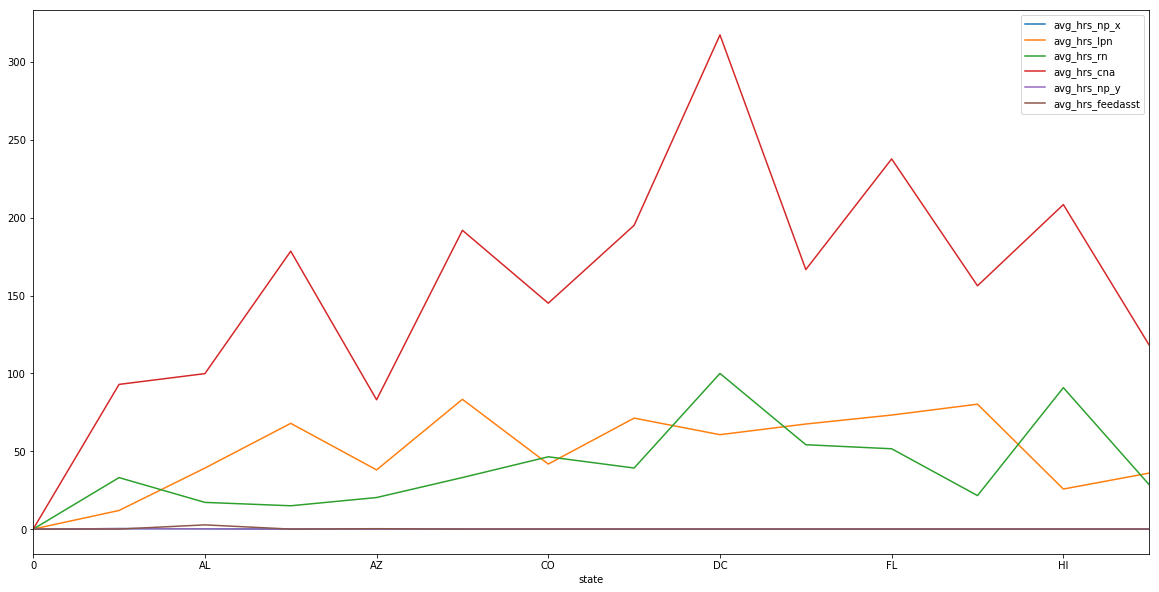

In [67]:
dg.set_index('state').plot(figsize=(20,10))

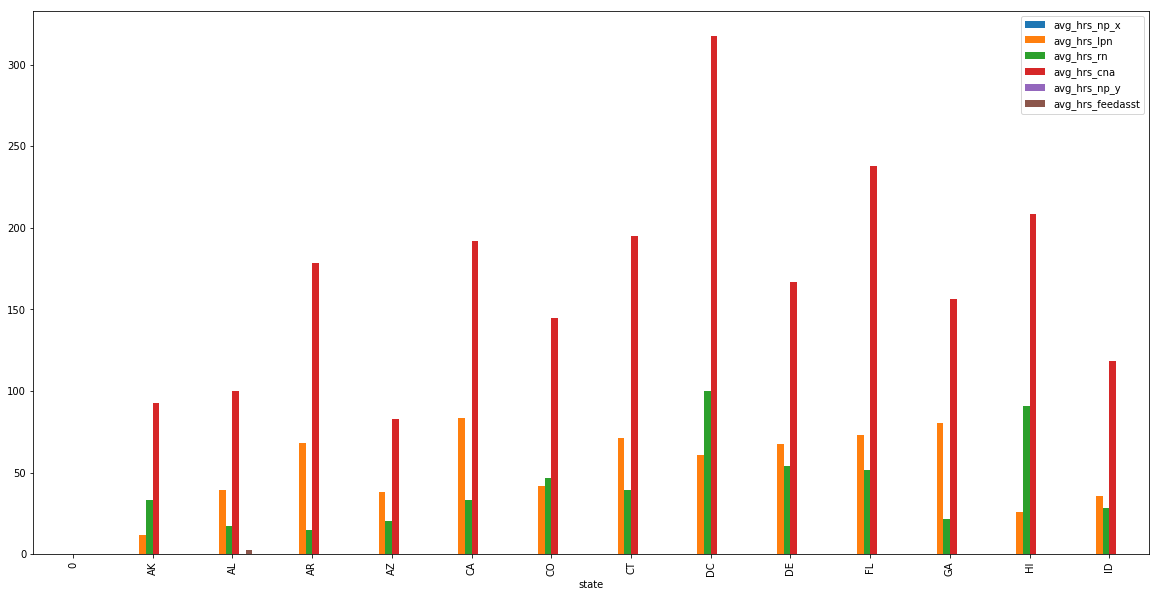

In [68]:
dg.set_index('state').plot.bar(figsize=(20,10))

Based on the chart the average total hours of CNA(certified nursing assistantis)and RN in the state DC are more than other states.

In [72]:
dg = df_payroll.groupby('state').sum()
dg['hrs_lpn_percent']   = (dg['hrs_lpn']   / dg['hrs_lpn'].sum()) * 100
dg['hrs_rn_percent'] = (dg['hrs_rn'] / dg['hrs_rn'].sum()) * 100
dg['hrs_cna_percent'] = (dg['hrs_cna'] / dg['hrs_cna'].sum()) * 100
dg['hrs_np_percent'] = (dg['hrs_np'] / dg['hrs_np'].sum()) * 100
dg['hrs_feedasst_percent'] = (dg['hrs_feedasst'] / dg['hrs_feedasst'].sum()) * 100
dg.round(2)
dg

,county_fips,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,hrs_cna,hrs_cna_ctr,hrs_cna_emp,...,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,hrs_lpn_percent,hrs_rn_percent,hrs_cna_percent,hrs_np_percent,hrs_feedasst_percent
state,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
AK,184736.0,5905.84,316.0,5589.84,308.5,0.0,308.5,153875.32,0.00,153875.32,...,826.54,288.00,0.0,288.00,81342.0,0.105061,0.549135,0.306255,5.451106,0.000000
AL,3020176.0,243901.46,1867.5,242033.96,580.5,82.5,498.0,4078074.83,46904.41,4031170.42,...,16363.38,5412.81,0.0,5412.81,3597818.0,8.493819,7.026688,8.116510,81.983457,94.721388
AR,1553972.0,0.00,0.0,0.00,0.0,0.0,0.0,3497318.62,17322.79,3479995.83,...,0.00,0.00,0.0,0.00,1400585.0,7.060637,2.943314,6.960643,0.000000,0.000000
AZ,362131.0,129879.04,579.0,129300.04,0.0,0.0,0.0,2059566.00,49612.19,2009953.81,...,25708.90,3077.53,0.0,3077.53,1751395.0,5.002610,5.041286,4.099113,12.565437,5.278612
CA,3041152.0,0.00,0.0,0.00,0.0,0.0,0.0,11332402.37,176229.92,11156172.45,...,0.00,0.00,0.0,0.00,4635481.0,26.118048,19.609887,22.554651,0.000000,0.000000
CO,972624.0,0.00,0.0,0.00,0.0,0.0,0.0,2922793.90,124578.11,2798215.79,...,0.00,0.00,0.0,0.00,1319876.0,4.465007,9.382721,5.817178,0.000000,0.000000
CT,110952.0,0.00,0.0,0.00,0.0,0.0,0.0,3661135.53,39696.48,3621439.05,...,0.00,0.00,0.0,0.00,1607766.0,7.097120,7.382923,7.286684,0.000000,0.000000
DC,1472.0,0.00,0.0,0.00,0.0,0.0,0.0,467135.03,4729.30,462405.73,...,0.00,0.00,0.0,0.00,179338.0,0.473539,1.475764,0.929729,0.000000,0.000000


identifying and analyzing the percentage average of the total hours for staffing.

In [74]:
dg1 = dg.groupby(["state"])["hrs_np_percent"].mean().reset_index(name="avg_hrs_np_percent")

avg_list = ["hrs_lpn_percent", "hrs_rn_percent","hrs_cna_percent","hrs_feedasst_percent"]

for item in avg_list:
    dummy = dg.groupby(["state"])[item].mean().reset_index(name="avg_"+item)
    dg1=pd.merge(dg1, dummy, on=["state"])


In [75]:
dg1.head()

,state,avg_hrs_np_percent,avg_hrs_lpn_percent,avg_hrs_rn_percent,avg_hrs_cna_percent,avg_hrs_feedasst_percent
0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,AK,5.451106,0.105061,0.549135,0.306255,0.000000
2,AL,81.983457,8.493819,7.026688,8.116510,94.721388
3,AR,0.000000,7.060637,2.943314,6.960643,0.000000
4,AZ,12.565437,5.002610,5.041286,4.099113,5.278612


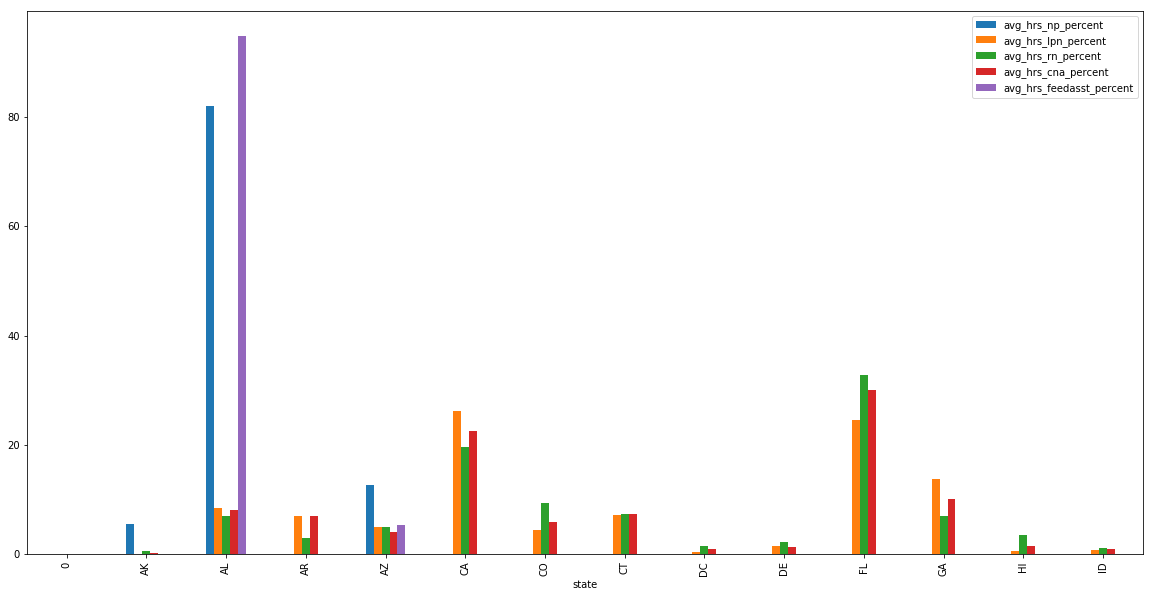

In [76]:
dg1.set_index('state').plot.bar(figsize=(20,10))

- Based on the chart in state AL percentage of average total hour of Feeding assistant is more than other states.
- In general the state Al average total of hours of feeding assistant and nurse practinior are more than other states.
- In the state FL percantage average total of hours of Register nurse and CNA are more than others.
- In the state CA percentage average total of hours of LPN(Licensed practical nurse) is more than others. 

The barchart reported %70 lower NP staffing in AZ, nursing home in AZ should increase the total of hours for NP by %70, increase the total of hours for CNA by %25, increase the total of hours for RN by %27 and increase the total of hours for LPN by %21.

I compared the percentage average total of hours for LPN, RN, CnA in the AZ with AL, FL and CA.
I also compared the percentage average total of hours for NP in AZ with AL.

For furthur analysis we can compare all this staffing by the total hours of working in weekdays and weekend.


 View summary of dataset 

In [157]:
df_payroll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293975 entries, 0 to 33171
Columns: 106 entries, city to day_of_week
dtypes: category(2), datetime64[ns](1), float64(98), object(5)
memory usage: 246.4+ MB


Findings

- we can see that the data set contain 6 categorical variables and 99 numerical variables.
- mdscensus is the target variable.


In [13]:
df_payroll.fillna(0)

,city,county_fips,county_name,cy_qtr,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,...,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,provname,provnum,state,workdate
0,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200701.0
1,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200702.0
2,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200703.0
3,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200704.0
4,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200705.0
5,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200706.0
6,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,47.0,"BURNS NURSING HOME, INC.",15009,AL,20200707.0
7,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,45.0,"BURNS NURSING HOME, INC.",15009,AL,20200708.0
8,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,45.0,"BURNS NURSING HOME, INC.",15009,AL,20200709.0
9,RUSSELLVILLE,59.0,Franklin,2020Q3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,45.0,"BURNS NURSING HOME, INC.",15009,AL,20200710.0


In [14]:
def initial_eda(df_payroll):
    if isinstance(df_payroll, pd.DataFrame):
        total_na = df_payroll.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df_payroll.shape[0], df_payroll.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df_payroll.columns
        dtyp = df_payroll.dtypes
        uniq = df_payroll.nunique()
        na_val = df_payroll.isna().sum()
        for i in range(len(df_payroll.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df_payroll)))

In [15]:
initial_eda(df_payroll)

Dimensions : 293975 rows, 105 columns
Total NA Values : 19574053 
                           Column Name  Data Type      #Distinct  NA Values
                                  city     object         1104          1
                           county_fips    float64          159          2
                           county_name     object          411          2
                                cy_qtr     object            1          2
                             hrs_admin    float64         2969     260804
                         hrs_admin_ctr    float64           22     260804
                         hrs_admin_emp    float64         2969     260804
                       hrs_clinnrsspec    float64           13     260804
                   hrs_clinnrsspec_ctr    float64            2     260804
                   hrs_clinnrsspec_emp    float64           13     260804
                               hrs_cna    float64        38099      33173
                           hrs_cna_ctr    fl

Types of variables

- In this section, I segregate the dataset into categorical and numerical variables.

- There are a mixture of categorical and numerical variables in the dataset.

- Categorical variables have data type object. Numerical variables have data type float64.

- First of all, I will explore categorical variables.

# Explore Categorical Variables 

 Find categorical variables

In [16]:
ds_cat = df_payroll.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,city,county_name,cy_qtr,provname,provnum,state
0,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL
1,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL


In [17]:
categorical = [var for var in df_payroll.columns if df_payroll[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['city', 'county_name', 'cy_qtr', 'provname', 'provnum', 'state']


Preview categorical variables

In [18]:
df_payroll[categorical].head()

,city,county_name,cy_qtr,provname,provnum,state
0,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL
1,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL
2,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL
3,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL
4,RUSSELLVILLE,Franklin,2020Q3,"BURNS NURSING HOME, INC.",15009,AL


Summary of categorical variables

There are 6 categorical variables in the dataset.

The categorical variables are given by provnum, provname, city, state, county_name and cy_qtr.


Frequency distribution of categorical variables

Now, we will check the frequency distribution of categorical variables.

In [19]:
for var in categorical: 
    
    print(df_payroll[var].value_counts())

LOS ANGELES         5060
BIRMINGHAM          3864
TUCSON              3680
PHOENIX             3496
JACKSONVILLE        3220
MOBILE              2392
SCOTTSDALE          2351
DENVER              2300
SARASOTA            2116
MIAMI               2116
COLORADO SPRINGS    2116
SAINT PETERSBURG    2116
MESA                2024
LONG BEACH          1932
ORLANDO             1840
HUNTSVILLE          1748
MONTGOMERY          1656
TAMPA               1656
WASHINGTON          1564
GLENDALE            1564
ATLANTA             1564
HONOLULU            1564
WILMINGTON          1472
FORT MYERS          1380
LITTLE ROCK         1380
PENSACOLA           1288
PEORIA              1288
CLEARWATER          1196
FRESNO              1196
SAN FRANCISCO       1196
                    ... 
WRIGHTSVILLE          92
ROYAL PALM BEACH      92
EL SOBRANTE           92
DANIA BEACH           92
AUBURNDALE            92
JUDSONIA              92
KENNESAW              92
CORONA                92
BERRYVILLE            92


Percentage of frequency distribution of values

In [20]:
import numpy as np
for var in categorical:
    
     print(df_payroll[var].value_counts()/np.float(len(df_payroll)))

LOS ANGELES         0.017212
BIRMINGHAM          0.013144
TUCSON              0.012518
PHOENIX             0.011892
JACKSONVILLE        0.010953
MOBILE              0.008137
SCOTTSDALE          0.007997
DENVER              0.007824
SARASOTA            0.007198
MIAMI               0.007198
COLORADO SPRINGS    0.007198
SAINT PETERSBURG    0.007198
MESA                0.006885
LONG BEACH          0.006572
ORLANDO             0.006259
HUNTSVILLE          0.005946
MONTGOMERY          0.005633
TAMPA               0.005633
WASHINGTON          0.005320
GLENDALE            0.005320
ATLANTA             0.005320
HONOLULU            0.005320
WILMINGTON          0.005007
FORT MYERS          0.004694
LITTLE ROCK         0.004694
PENSACOLA           0.004381
PEORIA              0.004381
CLEARWATER          0.004068
FRESNO              0.004068
SAN FRANCISCO       0.004068
                      ...   
WRIGHTSVILLE        0.000313
ROYAL PALM BEACH    0.000313
EL SOBRANTE         0.000313
DANIA BEACH   

In [21]:
df_payroll['county_fips'].nunique()

159

In [22]:
df_payroll['county_fips'].isnull().sum()

2

In [23]:
df_payroll['county_fips'].unique()

array([ 59., 121.,  71.,  73.,  83.,  51.,  21.,  33.,  77.,   3., 125.,
        53., 101., 119.,  17.,  43.,  29.,  95.,   1., 103.,  31.,  47.,
        35.,  97.,  55., 105.,  89.,  87., 127.,  15., 129.,  27., 111.,
        79., 107., 133., 117.,  93.,  61.,  69.,  57.,  49.,   9.,  23.,
       123.,  11.,  91., 113.,  13.,  65.,  25., 115.,  81.,   5.,  19.,
        37.,  45.,  39., 109.,   7.,  75.,  99.,  41.,  67., 131.,  85.,
       130.,  90., 122.,  20., 110., 220., 170., 143., 145., 137., 135.,
       141., 139.,  63., 147., 149.,  14.,  86., 261., 297., 201., 245.,
       215., 295., 223., 299., 205., 243., 285., 219., 213., 195., 301.,
       317., 293., 193., 313., 257., 207., 175., 303., 283., 189., 185.,
       217., 233., 279., 221., 271., 167., 277., 305., 275., 153., 171.,
       319., 211., 151., 169., 247., 259., 273., 287., 227., 269., 255.,
       315., 251., 179., 311., 267., 235., 237., 197., 199., 155., 177.,
       161., 321., 225., 183., 159., 163., 241., 18

In [24]:
df_payroll['city'].isnull().sum()

1

In [25]:
df_payroll['city'].nunique()

1104

In [26]:
df_payroll['city'].unique()

array(['RUSSELLVILLE', 'SYLACAUGA', 'SCOTTSBORO', ..., 'BUHL', nan, 'S'],
      dtype=object)

In [27]:
df_payroll['provname'].isnull().sum()

0

In [28]:
df_payroll['provname'].nunique()

2823

In [29]:
df_payroll['provname'].unique()

array(['BURNS NURSING HOME, INC.', 'COOSA VALLEY HEALTHCARE CENTER',
       'HIGHLANDS HEALTH AND REHAB', ...,
       'DESERT VIEW CARE CENTER OF BUHL', 'SHAW MOUNTAIN OF CASCADIA',
       'SH'], dtype=object)

In [30]:
df_payroll['state'].isnull().sum()

2

In [31]:
df_payroll['state'].nunique()

13

In [32]:
df_payroll['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', nan], dtype=object)

In [33]:
df_payroll['workdate'].isnull().sum()

2

In [34]:
df_payroll['workdate'].nunique()

92

In [35]:
df_payroll['workdate'].unique()

array([20200701., 20200702., 20200703., 20200704., 20200705., 20200706.,
       20200707., 20200708., 20200709., 20200710., 20200711., 20200712.,
       20200713., 20200714., 20200715., 20200716., 20200717., 20200718.,
       20200719., 20200720., 20200721., 20200722., 20200723., 20200724.,
       20200725., 20200726., 20200727., 20200728., 20200729., 20200730.,
       20200731., 20200801., 20200802., 20200803., 20200804., 20200805.,
       20200806., 20200807., 20200808., 20200809., 20200810., 20200811.,
       20200812., 20200813., 20200814., 20200815., 20200816., 20200817.,
       20200818., 20200819., 20200820., 20200821., 20200822., 20200823.,
       20200824., 20200825., 20200826., 20200827., 20200828., 20200829.,
       20200830., 20200831., 20200901., 20200902., 20200903., 20200904.,
       20200905., 20200906., 20200907., 20200908., 20200909., 20200910.,
       20200911., 20200912., 20200913., 20200914., 20200915., 20200916.,
       20200917., 20200918., 20200919., 20200920., 

In [36]:
# check for missing values

df_payroll['mdscensus'].isnull().sum()

2

In [37]:
# view number of unique values

df_payroll['mdscensus'].nunique()

367

In [38]:
df_payroll['mdscensus'].unique()

array([ 47.,  45.,  46.,  49.,  48.,  50.,  51.,  53.,  54.,  55.,  56.,
        57.,  52.,  77.,  78.,  76.,  75.,  74.,  73.,  71.,  72.,  70.,
        69.,  67.,  68.,  66.,  65.,  64.,  42.,  41.,  44.,  43.,  40.,
        39.,  38.,  37.,  80.,  79.,  81.,  83.,  84.,  85.,  86.,  88.,
        87.,  89., 126., 123., 122., 125., 124., 121., 119., 120., 129.,
       132., 133., 134., 136., 131., 128., 130., 127., 117., 118., 115.,
       112., 111., 108., 107., 109., 106., 104., 102., 103., 101., 114.,
       113., 110.,  94.,  93.,  92.,  91.,  90.,  95.,  96.,  97.,  99.,
        98., 100.,  63.,  62., 160., 159., 158., 162., 164., 163., 167.,
       166., 168., 170., 174., 173., 176., 175., 177., 179., 178., 172.,
       171., 169., 165., 155., 154., 153., 152., 161., 105.,  61.,  82.,
        60.,  58., 116., 187., 185., 184., 182., 180., 183., 181., 186.,
       189., 190., 188., 191., 192., 193., 215., 216., 213., 211., 212.,
       210., 209., 208., 207., 206., 203., 205., 20

There are 367 unique values in the mdscensus variable.

In [39]:
# view the unique values

df_payroll['mdscensus'].unique()

array([ 47.,  45.,  46.,  49.,  48.,  50.,  51.,  53.,  54.,  55.,  56.,
        57.,  52.,  77.,  78.,  76.,  75.,  74.,  73.,  71.,  72.,  70.,
        69.,  67.,  68.,  66.,  65.,  64.,  42.,  41.,  44.,  43.,  40.,
        39.,  38.,  37.,  80.,  79.,  81.,  83.,  84.,  85.,  86.,  88.,
        87.,  89., 126., 123., 122., 125., 124., 121., 119., 120., 129.,
       132., 133., 134., 136., 131., 128., 130., 127., 117., 118., 115.,
       112., 111., 108., 107., 109., 106., 104., 102., 103., 101., 114.,
       113., 110.,  94.,  93.,  92.,  91.,  90.,  95.,  96.,  97.,  99.,
        98., 100.,  63.,  62., 160., 159., 158., 162., 164., 163., 167.,
       166., 168., 170., 174., 173., 176., 175., 177., 179., 178., 172.,
       171., 169., 165., 155., 154., 153., 152., 161., 105.,  61.,  82.,
        60.,  58., 116., 187., 185., 184., 182., 180., 183., 181., 186.,
       189., 190., 188., 191., 192., 193., 215., 216., 213., 211., 212.,
       210., 209., 208., 207., 206., 203., 205., 20

In [40]:
# view the frequency distribution of values

df_payroll['mdscensus'].value_counts()

80.0     3721
77.0     3687
74.0     3680
76.0     3649
81.0     3609
71.0     3606
75.0     3582
79.0     3532
72.0     3464
73.0     3457
78.0     3397
82.0     3377
48.0     3370
70.0     3362
86.0     3338
68.0     3337
84.0     3319
57.0     3318
58.0     3289
47.0     3277
87.0     3276
83.0     3271
88.0     3259
85.0     3249
64.0     3225
63.0     3211
69.0     3210
56.0     3185
65.0     3122
67.0     3120
         ... 
345.0       2
331.0       2
372.0       2
283.0       2
326.0       2
343.0       2
367.0       2
332.0       1
358.0       1
1.0         1
330.0       1
356.0       1
327.0       1
329.0       1
282.0       1
286.0       1
334.0       1
328.0       1
374.0       1
360.0       1
357.0       1
348.0       1
299.0       1
362.0       1
366.0       1
287.0       1
377.0       1
281.0       1
344.0       1
333.0       1
Name: mdscensus, Length: 367, dtype: int64

In [41]:
# view percentage of frequency distribution of values

df_payroll['mdscensus'].value_counts()/len(df_payroll)

80.0     0.012658
77.0     0.012542
74.0     0.012518
76.0     0.012413
81.0     0.012277
71.0     0.012266
75.0     0.012185
79.0     0.012015
72.0     0.011783
73.0     0.011760
78.0     0.011555
82.0     0.011487
48.0     0.011464
70.0     0.011436
86.0     0.011355
68.0     0.011351
84.0     0.011290
57.0     0.011287
58.0     0.011188
47.0     0.011147
87.0     0.011144
83.0     0.011127
88.0     0.011086
85.0     0.011052
64.0     0.010970
63.0     0.010923
69.0     0.010919
56.0     0.010834
65.0     0.010620
67.0     0.010613
           ...   
345.0    0.000007
331.0    0.000007
372.0    0.000007
283.0    0.000007
326.0    0.000007
343.0    0.000007
367.0    0.000007
332.0    0.000003
358.0    0.000003
1.0      0.000003
330.0    0.000003
356.0    0.000003
327.0    0.000003
329.0    0.000003
282.0    0.000003
286.0    0.000003
334.0    0.000003
328.0    0.000003
374.0    0.000003
360.0    0.000003
357.0    0.000003
348.0    0.000003
299.0    0.000003
362.0    0.000003
366.0    0

Check missing values in categorical variables

In [42]:
df_payroll[categorical].isnull().sum()

city           1
county_name    2
cy_qtr         2
provname       0
provnum        0
state          2
dtype: int64

Now, we can see that city, county_name, cy_qtr and state variable contains missing values.

 Number of labels: Cardinality

In [43]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df_payroll[var].unique()), ' labels')
    

city  contains  1105  labels
county_name  contains  412  labels
cy_qtr  contains  2  labels
provname  contains  2823  labels
provnum  contains  2933  labels
state  contains  14  labels


We can see that provnum and provname columns contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

#  Explore Numerical Variables

 Find numerical variables

In [44]:
numerical = [var for var in df_payroll.columns if df_payroll[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 99 numerical variables

The numerical variables are :

 ['county_fips', 'hrs_admin', 'hrs_admin_ctr', 'hrs_admin_emp', 'hrs_clinnrsspec', 'hrs_clinnrsspec_ctr', 'hrs_clinnrsspec_emp', 'hrs_cna', 'hrs_cna_ctr', 'hrs_cna_emp', 'hrs_dietician', 'hrs_dietician_ctr', 'hrs_dietician_emp', 'hrs_feedasst', 'hrs_feedasst_ctr', 'hrs_feedasst_emp', 'hrs_lpn', 'hrs_lpn_ctr', 'hrs_lpn_emp', 'hrs_lpnadmin', 'hrs_lpnadmin_ctr', 'hrs_lpnadmin_emp', 'hrs_medaide', 'hrs_medaide_ctr', 'hrs_medaide_emp', 'hrs_meddir', 'hrs_meddir_ctr', 'hrs_meddir_emp', 'hrs_mhsvc', 'hrs_mhsvc_ctr', 'hrs_mhsvc_emp', 'hrs_natrn', 'hrs_natrn_ctr', 'hrs_natrn_emp', 'hrs_np', 'hrs_np_ctr', 'hrs_np_emp', 'hrs_ot', 'hrs_ot_ctr', 'hrs_ot_emp', 'hrs_otaide', 'hrs_otaide_ctr', 'hrs_otaide_emp', 'hrs_otasst', 'hrs_otasst_ctr', 'hrs_otasst_emp', 'hrs_othactv', 'hrs_othactv_ctr', 'hrs_othactv_emp', 'hrs_othmd', 'hrs_othmd_ctr', 'hrs_othmd_emp', 'hrs_othsocwrk', 'hrs_othsocwrk_ctr', 'hrs_othsocwrk_emp', 'hrs_pa', 'hrs_pa_ctr

 Preview the numerical variables

In [45]:
import pandas as pd
payroll_non_nursing_staff = pd.read_csv('Ensign Healthcare/78y2-smqp.csv')
payroll_nursing_staff = pd.read_csv('Ensign Healthcare/2qky-49qq.csv')

df_payroll = pd.concat([payroll_nursing_staff, payroll_non_nursing_staff])
df_payroll[numerical].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,county_fips,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,hrs_cna,hrs_cna_ctr,hrs_cna_emp,...,hrs_rndon_ctr,hrs_rndon_emp,hrs_spclangpath,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,workdate
0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,119.96,0.00,119.96,...,0.0,8.00,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200701.0
1,59.0,NaN,NaN,NaN,NaN,NaN,NaN,139.08,7.50,131.58,...,0.0,7.50,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200702.0
2,59.0,NaN,NaN,NaN,NaN,NaN,NaN,130.28,7.50,122.78,...,0.0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200703.0
3,59.0,NaN,NaN,NaN,NaN,NaN,NaN,120.33,0.00,120.33,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200704.0
4,59.0,NaN,NaN,NaN,NaN,NaN,NaN,117.00,7.75,109.25,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200705.0


In [46]:
df_payroll[numerical].fillna(0)

,county_fips,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,hrs_cna,hrs_cna_ctr,hrs_cna_emp,...,hrs_rndon_ctr,hrs_rndon_emp,hrs_spclangpath,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,workdate
0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,119.96,0.00,119.96,...,0.0,8.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200701.0
1,59.0,0.0,0.0,0.0,0.0,0.0,0.0,139.08,7.50,131.58,...,0.0,7.50,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200702.0
2,59.0,0.0,0.0,0.0,0.0,0.0,0.0,130.28,7.50,122.78,...,0.0,14.75,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200703.0
3,59.0,0.0,0.0,0.0,0.0,0.0,0.0,120.33,0.00,120.33,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200704.0
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,117.00,7.75,109.25,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200705.0
5,59.0,0.0,0.0,0.0,0.0,0.0,0.0,122.34,0.00,122.34,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200706.0
6,59.0,0.0,0.0,0.0,0.0,0.0,0.0,133.33,0.00,133.33,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200707.0
7,59.0,0.0,0.0,0.0,0.0,0.0,0.0,140.74,7.50,133.24,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,45.0,20200708.0
8,59.0,0.0,0.0,0.0,0.0,0.0,0.0,151.42,7.50,143.92,...,0.0,8.75,0.00,0.0,0.00,0.0,0.0,0.0,45.0,20200709.0
9,59.0,0.0,0.0,0.0,0.0,0.0,0.0,130.87,7.35,123.52,...,0.0,19.75,0.00,0.0,0.00,0.0,0.0,0.0,45.0,20200710.0


 Summary of numerical variables

In [47]:
df_payroll[numerical].head()

,county_fips,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,hrs_cna,hrs_cna_ctr,hrs_cna_emp,...,hrs_rndon_ctr,hrs_rndon_emp,hrs_spclangpath,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,workdate
0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,119.96,0.00,119.96,...,0.0,8.00,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200701.0
1,59.0,NaN,NaN,NaN,NaN,NaN,NaN,139.08,7.50,131.58,...,0.0,7.50,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200702.0
2,59.0,NaN,NaN,NaN,NaN,NaN,NaN,130.28,7.50,122.78,...,0.0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200703.0
3,59.0,NaN,NaN,NaN,NaN,NaN,NaN,120.33,0.00,120.33,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200704.0
4,59.0,NaN,NaN,NaN,NaN,NaN,NaN,117.00,7.75,109.25,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,47.0,20200705.0


There are 99 numerical variables.
There are given by county_fips, workdate, hrs_rndon, mdscensus,hrs_rn,hrs_np,.......
All of the numerical variables are of discrete data type

Check missing values in numerical variables

In [48]:
df_payroll[numerical].isnull().sum()

county_fips                  2
hrs_admin               260804
hrs_admin_ctr           260804
hrs_admin_emp           260804
hrs_clinnrsspec         260804
hrs_clinnrsspec_ctr     260804
hrs_clinnrsspec_emp     260804
hrs_cna                  33173
hrs_cna_ctr              33173
hrs_cna_emp              33173
hrs_dietician           260804
hrs_dietician_ctr       260804
hrs_dietician_emp       260804
hrs_feedasst            260804
hrs_feedasst_ctr        260804
hrs_feedasst_emp        260804
hrs_lpn                  33173
hrs_lpn_ctr              33173
hrs_lpn_emp              33173
hrs_lpnadmin             33173
hrs_lpnadmin_ctr         33173
hrs_lpnadmin_emp         33173
hrs_medaide              33173
hrs_medaide_ctr          33173
hrs_medaide_emp          33173
hrs_meddir              260804
hrs_meddir_ctr          260804
hrs_meddir_emp          260804
hrs_mhsvc               260804
hrs_mhsvc_ctr           260804
                         ...  
hrs_ptasst_emp          260804
hrs_qual

In [49]:
df_payroll[numerical].fillna(0)

,county_fips,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,hrs_cna,hrs_cna_ctr,hrs_cna_emp,...,hrs_rndon_ctr,hrs_rndon_emp,hrs_spclangpath,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus,workdate
0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,119.96,0.00,119.96,...,0.0,8.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200701.0
1,59.0,0.0,0.0,0.0,0.0,0.0,0.0,139.08,7.50,131.58,...,0.0,7.50,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200702.0
2,59.0,0.0,0.0,0.0,0.0,0.0,0.0,130.28,7.50,122.78,...,0.0,14.75,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200703.0
3,59.0,0.0,0.0,0.0,0.0,0.0,0.0,120.33,0.00,120.33,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200704.0
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,117.00,7.75,109.25,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200705.0
5,59.0,0.0,0.0,0.0,0.0,0.0,0.0,122.34,0.00,122.34,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200706.0
6,59.0,0.0,0.0,0.0,0.0,0.0,0.0,133.33,0.00,133.33,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,47.0,20200707.0
7,59.0,0.0,0.0,0.0,0.0,0.0,0.0,140.74,7.50,133.24,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,45.0,20200708.0
8,59.0,0.0,0.0,0.0,0.0,0.0,0.0,151.42,7.50,143.92,...,0.0,8.75,0.00,0.0,0.00,0.0,0.0,0.0,45.0,20200709.0
9,59.0,0.0,0.0,0.0,0.0,0.0,0.0,130.87,7.35,123.52,...,0.0,19.75,0.00,0.0,0.00,0.0,0.0,0.0,45.0,20200710.0


View the distribution of some numercal variable

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


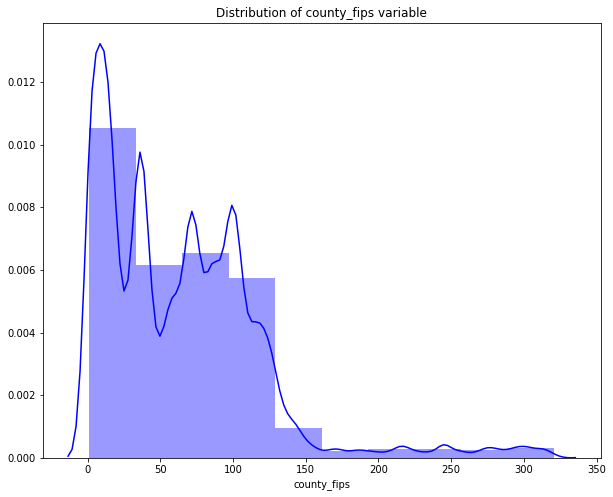

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['county_fips']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of county_fips variable")
plt.show()

Detect outliers in county_fips variable with boxplot

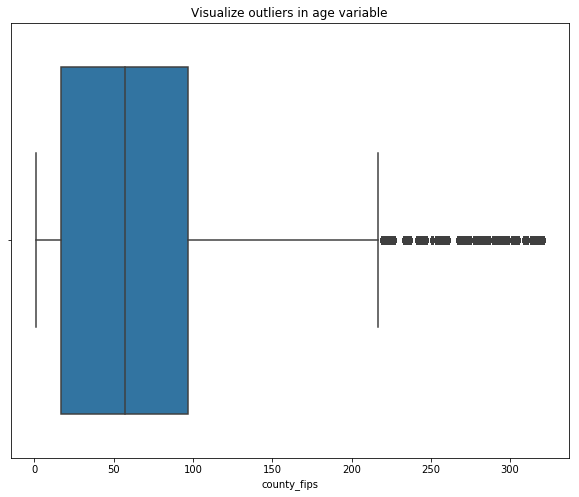

In [51]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['county_fips']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

We can see that there are lots of outliers in county_fips variable.

We can see that county_fips is slightly positively skewed.

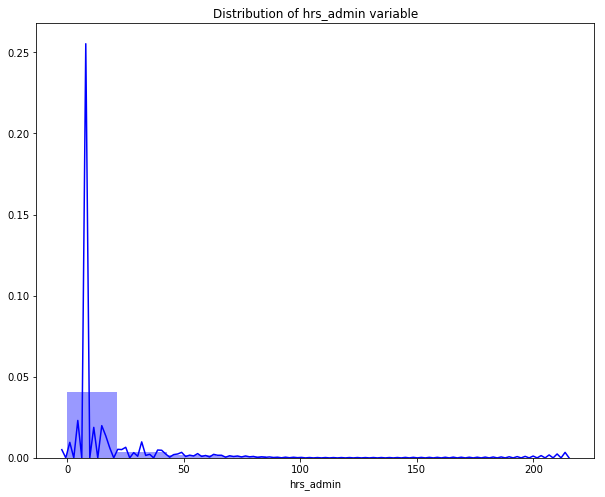

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_admin']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_admin variable")
plt.show()

Detect outliers in hrs_admin variable with boxplot

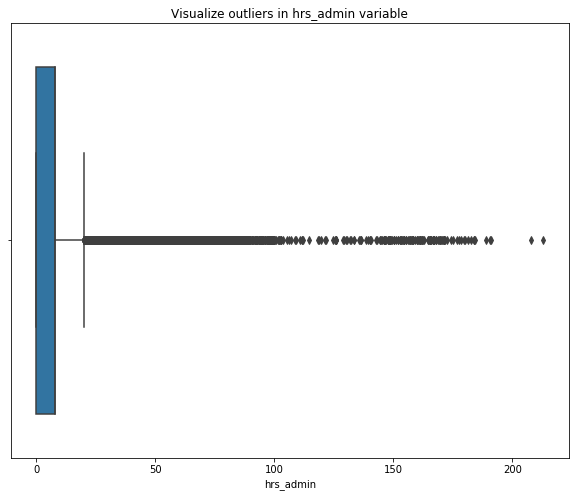

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_admin']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_admin variable")
plt.show()

We can see that there are lots of outliers in hrs_admin variable.

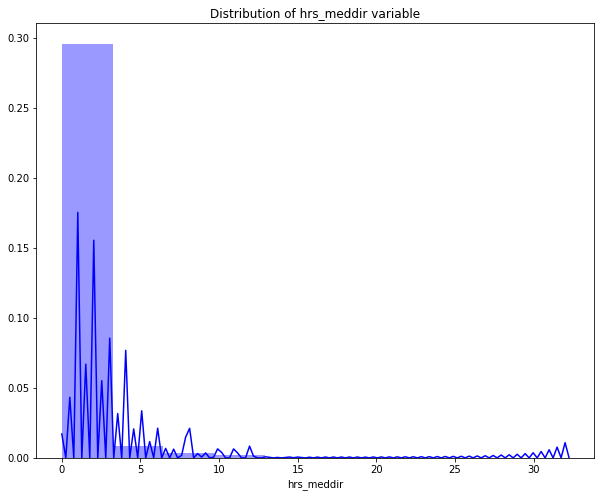

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_meddir']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_meddir variable")
plt.show()

Detect outliers in hrs_meddir variable with boxplot

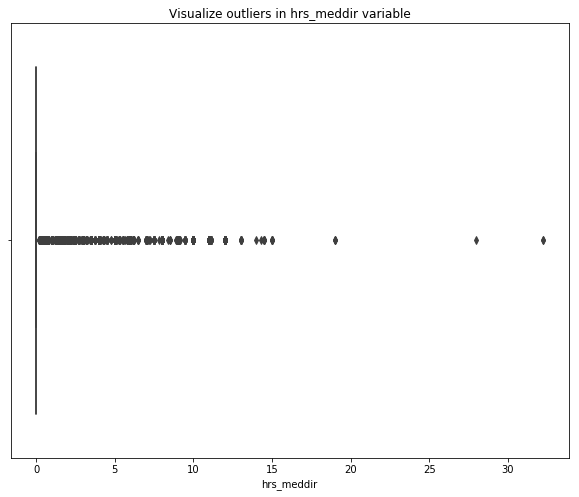

In [55]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_meddir']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_meddir variable")
plt.show()

We can see that there are lots of outliers in hrs_meddir variable.

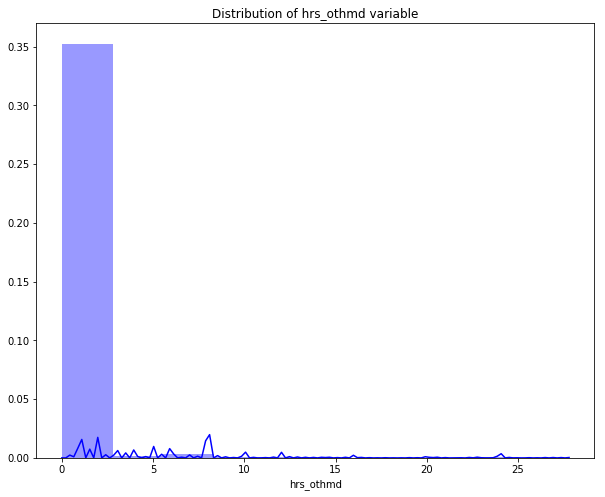

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_othmd']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_othmd variable")
plt.show()

Detect outliers in hrs_othmd variable with boxplot

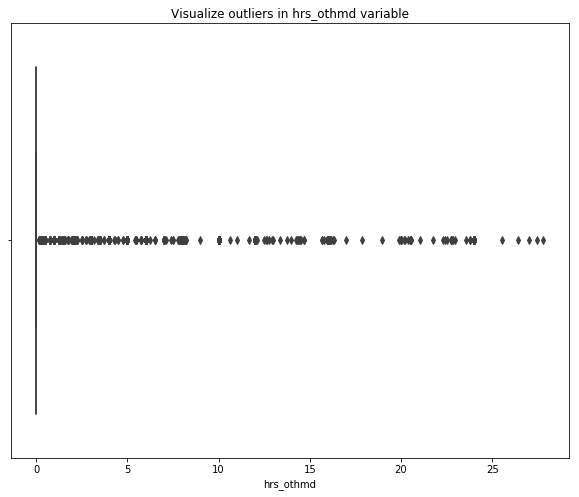

In [57]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_othmd']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_othmd variable")
plt.show()

We can see that there are lots of outliers in hrs_othmd variable.

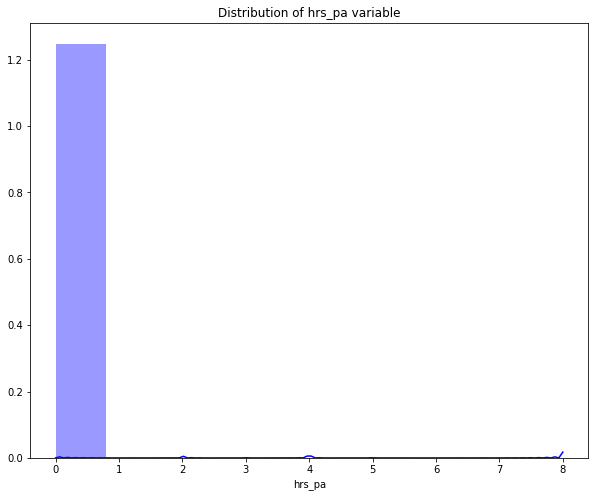

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_pa']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_pa variable")
plt.show()

Detect outliers in hrs_pavariable with boxplot

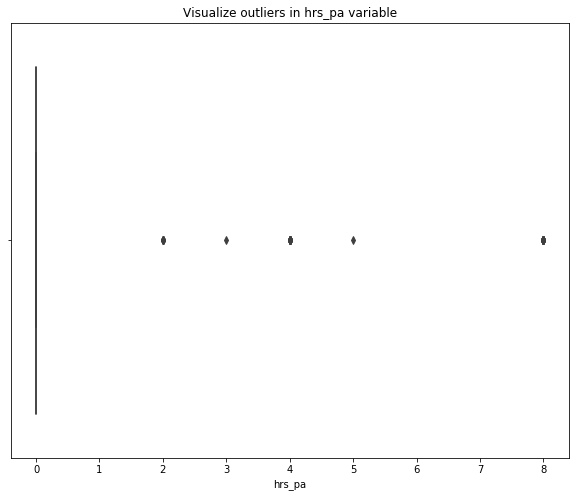

In [59]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_pa']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_pa variable")
plt.show()

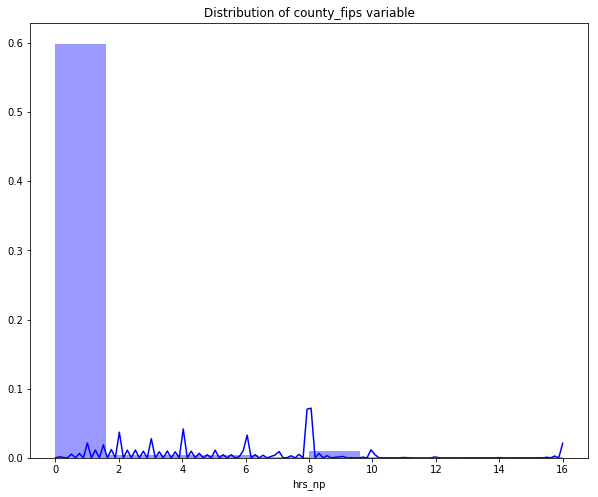

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_np']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of county_fips variable")
plt.show()

Detect outliers in hrs_np variable with boxplot

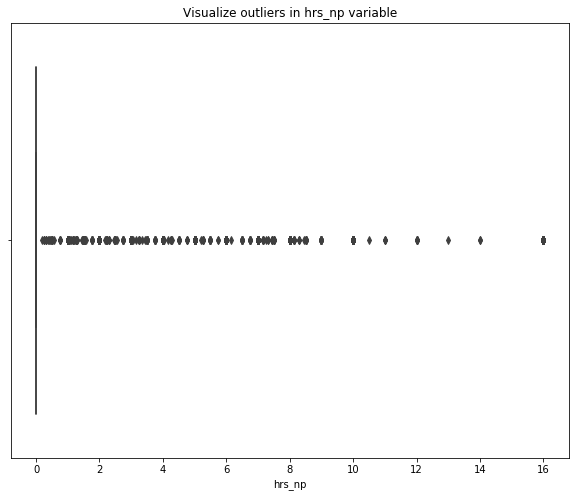

In [61]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_np']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_np variable")
plt.show()

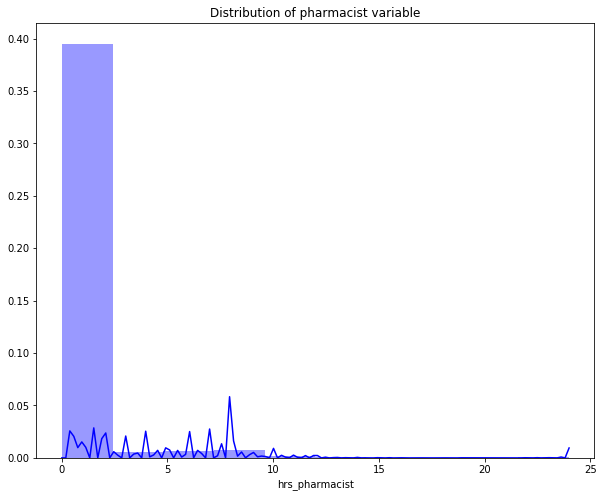

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_pharmacist']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of pharmacist variable")
plt.show()

Detect outliers in hrs_pharmacist variable with boxplot

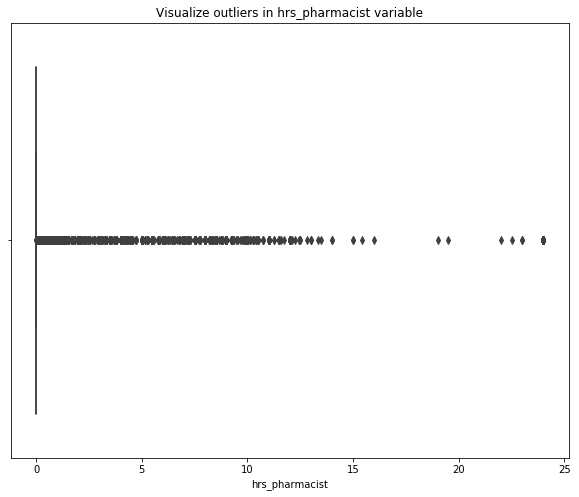

In [63]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_pharmacist']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_pharmacist variable")
plt.show()

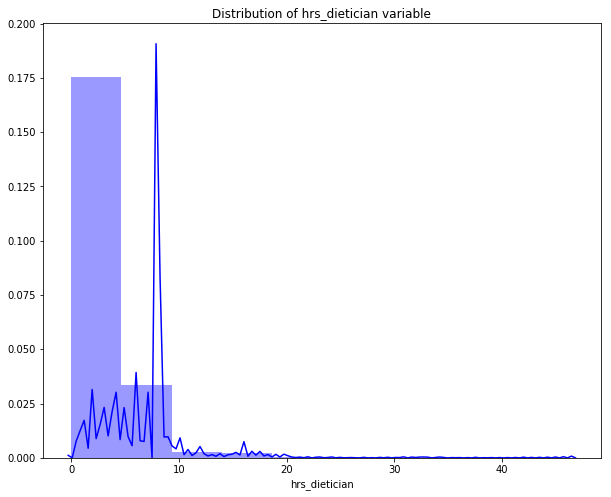

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_dietician']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_dietician variable")
plt.show()

Detect outliers in hrs_dietician variable with boxplot

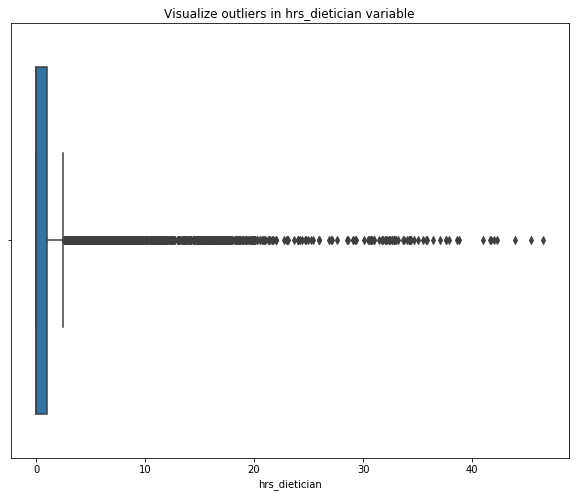

In [65]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_dietician']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_dietician variable")
plt.show()

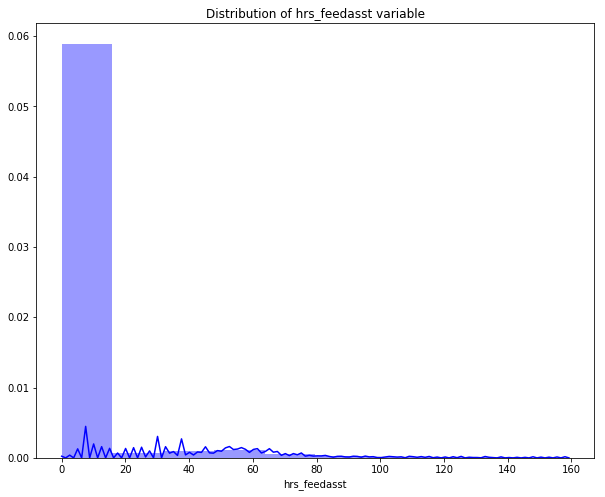

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_feedasst']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_feedasst variable")
plt.show()

Detect outliers in hrs_feedasst variable with boxplot

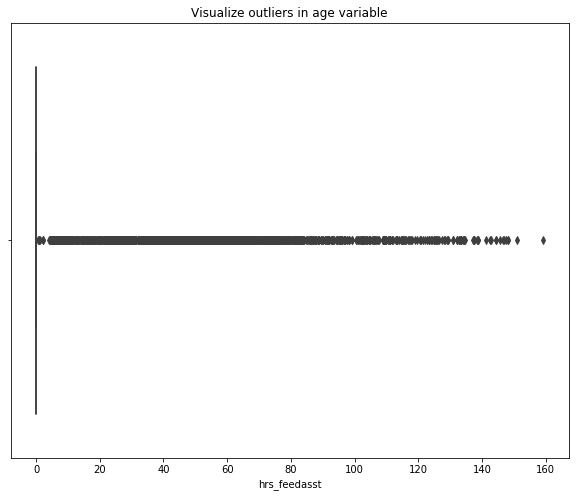

In [67]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_feedasst']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

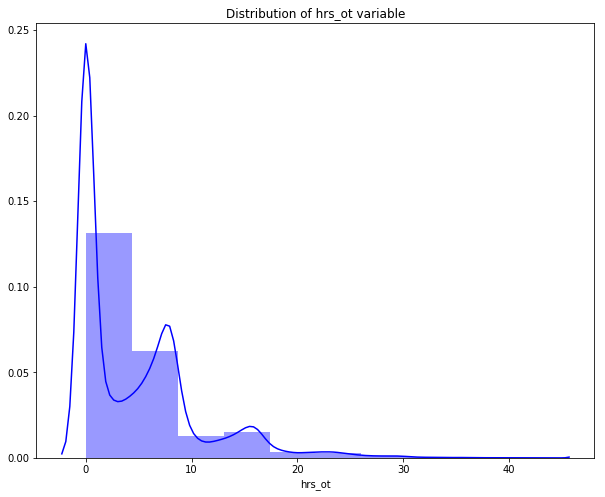

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_ot']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_ot variable")
plt.show()

We can see that hrs_ot is slightly right skewed.

Detect outliers in hrs_ot variable with boxplot

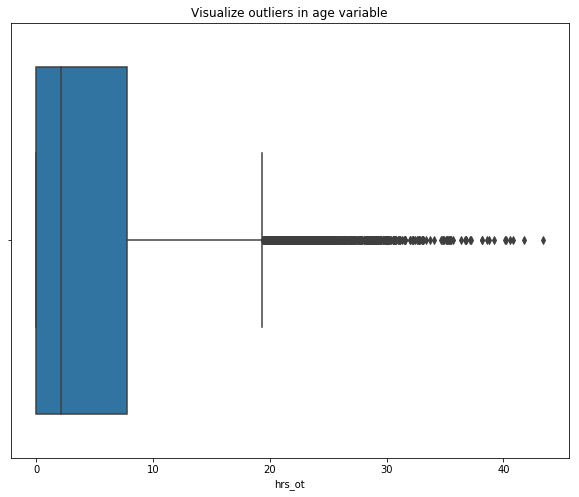

In [69]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_ot']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

We can see that there are lots of outliers in hrs_ot variable.

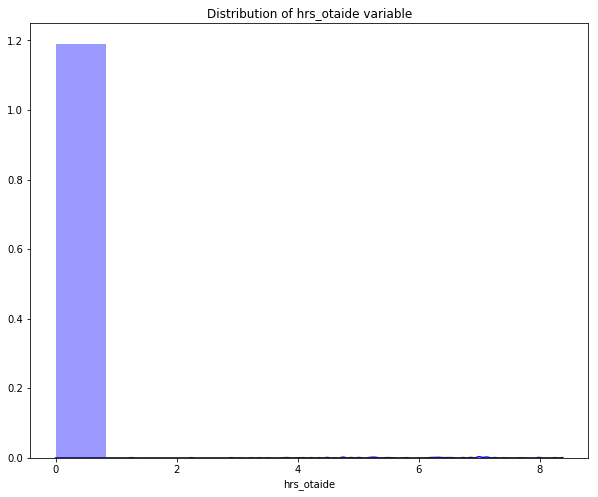

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_otaide']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of hrs_otaide variable")
plt.show()

Detect outliers in hrs_otaide variable with boxplot

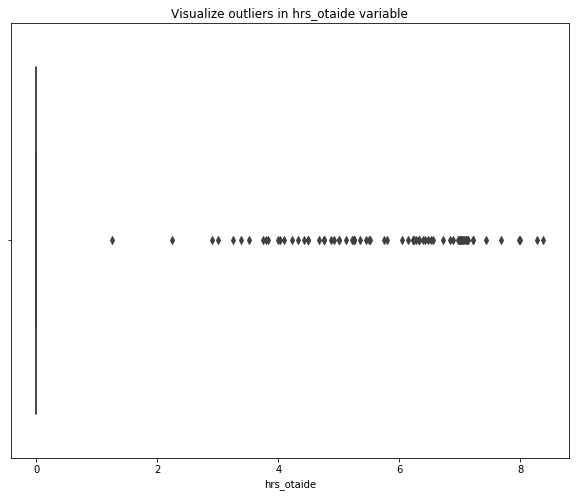

In [71]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['hrs_otaide']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in hrs_otaide variable")
plt.show()

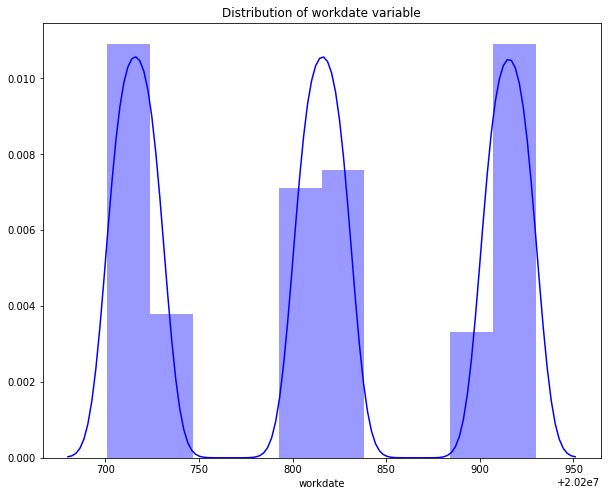

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['workdate']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of workdate variable")
plt.show()

This is a bimodal shape

Detect outliers in workdate variable with boxplot

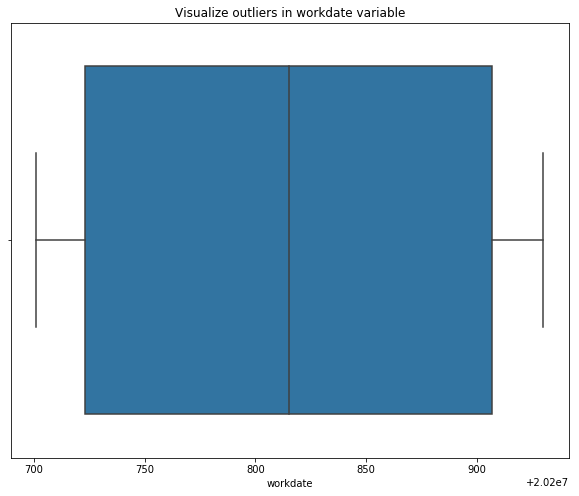

In [73]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['workdate']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in workdate variable")
plt.show()

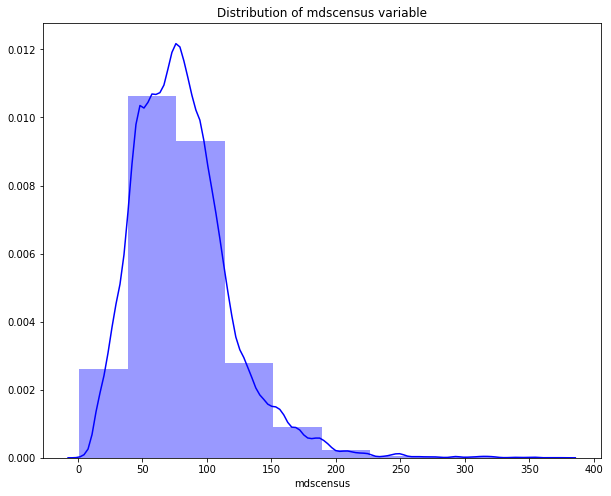

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['mdscensus']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of mdscensus variable")
plt.show()

This is a bell-shaped and Normal distribution. In this distribution my data is evenly distributed and centered around the mean value.

Detect outliers in mdscensus variable with boxplot

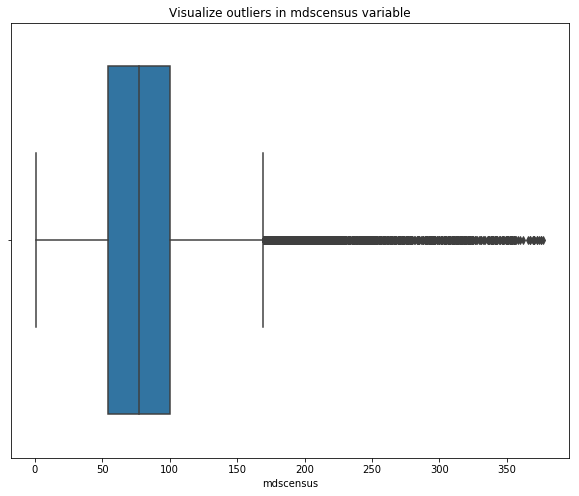

In [75]:
f, ax = plt.subplots(figsize=(10,8))
x = df_payroll['mdscensus']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in mdscensus variable")
plt.show()

- Based on the distribution mdscensus and workdate has a interesting insight and we can do some interesting analyze and prediction.
- the target variable should have a fairly uniform distribution.mdscensus can be our target variable

Visualize relationship between mdscensus and state

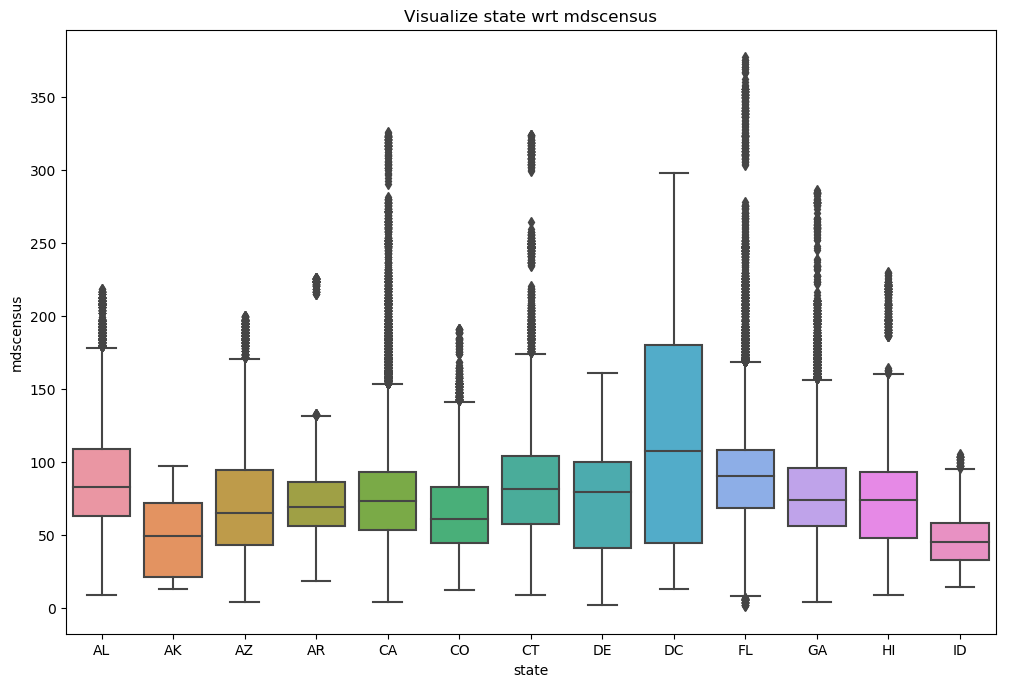

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='state', y="mdscensus", data = df_payroll)
plt.title("Visualize state wrt mdscensus")
plt.show()

Resident Census from MDS in FL and CA are more than other states.

In [189]:
df = df_payroll.groupby('state')['hrs_admin'].nunique()

In [192]:
df.head(13)

state
AK      67
AL    2071
AR       0
AZ    1220
CA       0
CO       0
CT       0
DC       0
DE       0
FL       0
GA       0
HI       0
ID       0
Name: hrs_admin, dtype: int64

Total Hours for Administrator in AL is more than other states.

In [193]:
df1 = df_payroll.groupby('state')['hrs_meddir'].nunique()
df1.head(13)

state
AK     7
AL    77
AR     0
AZ    59
CA     0
CO     0
CT     0
DC     0
DE     0
FL     0
GA     0
HI     0
ID     0
Name: hrs_meddir, dtype: int64

Total Hours for Medical Director in AL is more than others.

In [194]:
df2 = df_payroll.groupby('state')['hrs_np'].nunique()
df2.head(13)

state
AK     2
AL    48
AR     0
AZ    49
CA     0
CO     0
CT     0
DC     0
DE     0
FL     0
GA     0
HI     0
ID     0
Name: hrs_np, dtype: int64

Total Hours for Nurse Practitioner in AZ is more than others.

In [197]:
df3 = df_payroll.groupby('state')['hrs_ot'].nunique()
df3.head(13)

state
AK     164
AL    1683
AR       0
AZ    1899
CA       0
CO       0
CT       0
DC       0
DE       0
FL       0
GA       0
HI       0
ID       0
Name: hrs_ot, dtype: int64

Total Hours for Occupational Therapist in AZ is more than other states.

In [198]:
df4 = df_payroll.groupby('state')['hrs_pharmacist'].nunique()
df4.head(13)

state
AK     36
AL    123
AR      0
AZ    154
CA      0
CO      0
CT      0
DC      0
DE      0
FL      0
GA      0
HI      0
ID      0
Name: hrs_pharmacist, dtype: int64

Total Hours for Pharmacist in AZ is more than others

In [201]:
df5 = df_payroll.groupby('state')['hrs_dietician'].nunique()
df5.head(13)

state
AK     43
AL    256
AR      0
AZ    509
CA      0
CO      0
CT      0
DC      0
DE      0
FL      0
GA      0
HI      0
ID      0
Name: hrs_dietician, dtype: int64

Total Hours for Dietician in AZ is more than others.

In [202]:
df6 = df_payroll.groupby('state')['hrs_feedasst'].nunique()
df6.head(13)

state
AK       1
AL    1470
AR       0
AZ     170
CA       0
CO       0
CT       0
DC       0
DE       0
FL       0
GA       0
HI       0
ID       0
Name: hrs_feedasst, dtype: int64

Total Hours for Feeding Assistant in Al is more than others.

In [203]:
df7 = df_payroll.groupby('state')['hrs_otaide'].nunique()
df7.head(13)

state
AK     7
AL    36
AR     0
AZ    26
CA     0
CO     0
CT     0
DC     0
DE     0
FL     0
GA     0
HI     0
ID     0
Name: hrs_otaide, dtype: int64

Total Hours for Occupational Therapy Aide in AL is more than others.

In [204]:
df8 = df_payroll.groupby('state')['hrs_pt'].nunique()
df8.head(13)

state
AK     151
AL    1354
AR       0
AZ    1937
CA       0
CO       0
CT       0
DC       0
DE       0
FL       0
GA       0
HI       0
ID       0
Name: hrs_pt, dtype: int64

Total Hours for Physical Therapist in AZ is more than others.

In [205]:
df9 = df_payroll.groupby('state')['hrs_othactv'].nunique()
df9.head(13)

state
AK      91
AL    1741
AR       0
AZ    2059
CA       0
CO       0
CT       0
DC       0
DE       0
FL       0
GA       0
HI       0
ID       0
Name: hrs_othactv, dtype: int64

Total Hours for Other Activities Staff in AZ is more than others.

In [206]:
df10 = df_payroll.groupby('state')['mdscensus'].nunique()
df10.head(13)

state
AK     48
AL    205
AR    127
AZ    193
CA    303
CO    172
CT    263
DC    147
DE    151
FL    341
GA    257
HI    182
ID     87
Name: mdscensus, dtype: int64

Resident Census from MDS in FL and CA are more than others.

based on the result of total hours of Non_Nurse staffing, I think the nursing home in AZ should:
1. increase the total hours for the administrator
2. increase the total hours for the medical director
3. increase the total hours for the feeding assistant
4. increase the total hours for the occupational therapy aide

In [83]:
dg = df_payroll.groupby('state')['hrs_rndon'].nunique()
dg.head(13)

state
AK      3
AL    267
AR    462
AZ    173
CA    626
CO    253
CT    137
DC     29
DE     83
FL    419
GA    513
HI     21
ID    143
Name: hrs_rndon, dtype: int64

Total Hours for RN director of nursing in CA is more than others.

In [84]:
dg1 = df_payroll.groupby('state')['hrs_cna'].nunique()
dg1.head(13)

state
AK      618
AL    10869
AR     9852
AZ     9192
CA    24707
CO    10867
CT     6931
DC     1256
DE     2907
FL    21082
GA    13830
HI     2081
ID     2863
Name: hrs_cna, dtype: int64

Total Hours for CNA in CA is more than others.

In [85]:
dg2 = df_payroll.groupby('state')['hrs_rn'].nunique()
dg2.head(13)

state
AK      450
AL     5539
AR     3009
AZ     5442
CA     9465
CO     6745
CT     3731
DC      980
DE     2147
FL    10796
GA     5152
HI     1841
ID     2167
Name: hrs_rn, dtype: int64

Total Hours for RN in FL is more than others.

In [86]:
dg3 = df_payroll.groupby('state')['hrs_lpn'].nunique()
dg3.head(13)

state
AK      306
AL     7907
AR     6382
AZ     7542
CA    16489
CO     6680
CT     5142
DC      713
DE     2368
FL    12012
GA    10218
HI     1126
ID     2335
Name: hrs_lpn, dtype: int64

Total Hours for LPN in CA is more than others.

In [87]:
dg4 = df_payroll.groupby('state')['hrs_medaide'].nunique()
dg4.head(13)

state
AK      1
AL     28
AR    223
AZ    181
CA    112
CO    623
CT     53
DC     29
DE      1
FL    175
GA      9
HI     83
ID     51
Name: hrs_medaide, dtype: int64

Total Hours for Medaide in CO is more than others.

based on the result of total hours of Nurse staffing, I think the nursing home in AZ should:

1. increase the total hours for the RN director of nursing 
2. increase the total hours for the CNA 
3. increase the total hours for the RN
4. increase the total hours for the LPN
5. increase the total hours for the Medaide

in their facility.



As I mentioned in one of our plots that that CA has more residents because of the highest total of hours for Non_Nurse and Nurse Staffing. I think the nursing home in the AZ should increase the total hours of some Non_Nurse and Nurse staffing which I realized by table and plot.

Based on the scatterplot total hours of work for nursing_staffing and non_nursing staffing positively correlate with mdscensus.

Find out the correlations

In [102]:
corr = df_payroll.corr()
corr

,county_fips,hrs_admin,hrs_admin_ctr,hrs_admin_emp,hrs_clinnrsspec,hrs_clinnrsspec_ctr,hrs_clinnrsspec_emp,hrs_cna,hrs_cna_ctr,hrs_cna_emp,...,hrs_rndon,hrs_rndon_ctr,hrs_rndon_emp,hrs_spclangpath,hrs_spclangpath_ctr,hrs_spclangpath_emp,hrs_therrecspec,hrs_therrecspec_ctr,hrs_therrecspec_emp,mdscensus
county_fips,1.000000,-0.028992,0.000648,-0.029035,-0.004269,0.006594,-0.006439,-0.001087,0.024989,-0.006233,...,0.044108,0.039627,0.037462,-0.019082,0.010231,-0.058261,-0.021793,NaN,-0.021793,0.003617
hrs_admin,-0.028992,1.000000,0.034928,0.999174,0.049464,0.004132,0.050405,-0.272249,-0.033103,-0.271536,...,-0.184011,-0.015405,-0.182360,0.505180,0.443186,0.232920,0.068424,NaN,0.068424,0.037255
hrs_admin_ctr,0.000648,0.034928,1.000000,-0.005714,-0.000611,-0.000197,-0.000579,-0.048742,-0.005927,-0.048615,...,-0.032944,-0.002758,-0.032649,0.037784,0.041950,0.001278,-0.001976,NaN,-0.001976,-0.005191
hrs_admin_emp,-0.029035,0.999174,-0.005714,1.000000,0.049518,0.004142,0.050459,-0.270429,-0.032882,-0.269721,...,-0.182781,-0.015302,-0.181141,0.503944,0.441744,0.233006,0.068545,NaN,0.068545,0.037489
hrs_clinnrsspec,-0.004269,0.049464,-0.000611,0.049518,1.000000,0.287647,0.957705,-0.028680,-0.003487,-0.028604,...,-0.019384,-0.001623,-0.019210,0.016788,-0.000786,0.036192,0.013700,NaN,0.013700,-0.003256
hrs_clinnrsspec_ctr,0.006594,0.004132,-0.000197,0.004142,0.287647,1.000000,-0.000110,-0.009249,-0.001125,-0.009225,...,-0.006251,-0.000523,-0.006195,0.006137,0.007352,-0.000780,0.051274,NaN,0.051274,0.008957
hrs_clinnrsspec_emp,-0.006439,0.050405,-0.000579,0.050459,0.957705,-0.000110,1.000000,-0.027166,-0.003303,-0.027095,...,-0.018361,-0.001537,-0.018197,0.015685,-0.003030,0.038023,-0.001101,NaN,-0.001101,-0.006090
hrs_cna,-0.001087,-0.272249,-0.048742,-0.270429,-0.028680,-0.009249,-0.027166,1.000000,0.207884,0.979692,...,0.261673,-0.000293,0.263187,-0.319018,-0.254972,-0.192747,-0.092672,NaN,-0.092672,0.695559
hrs_cna_ctr,0.024989,-0.033103,-0.005927,-0.032882,-0.003487,-0.001125,-0.003303,0.207884,1.000000,0.007537,...,0.026694,0.032209,0.021241,-0.038790,-0.031002,-0.023436,-0.011268,NaN,-0.011268,0.172279
hrs_cna_emp,-0.006233,-0.271536,-0.048615,-0.269721,-0.028604,-0.009225,-0.027095,0.979692,0.007537,1.000000,...,0.262038,-0.006902,0.264703,-0.318183,-0.254304,-0.192242,-0.092429,NaN,-0.092429,0.675760


In [103]:
corr.fillna(0, inplace=True)

Correlation matrix gives us an idea how feature correlate with each other
And can help us to predict the model.
This is a powerful plot method.

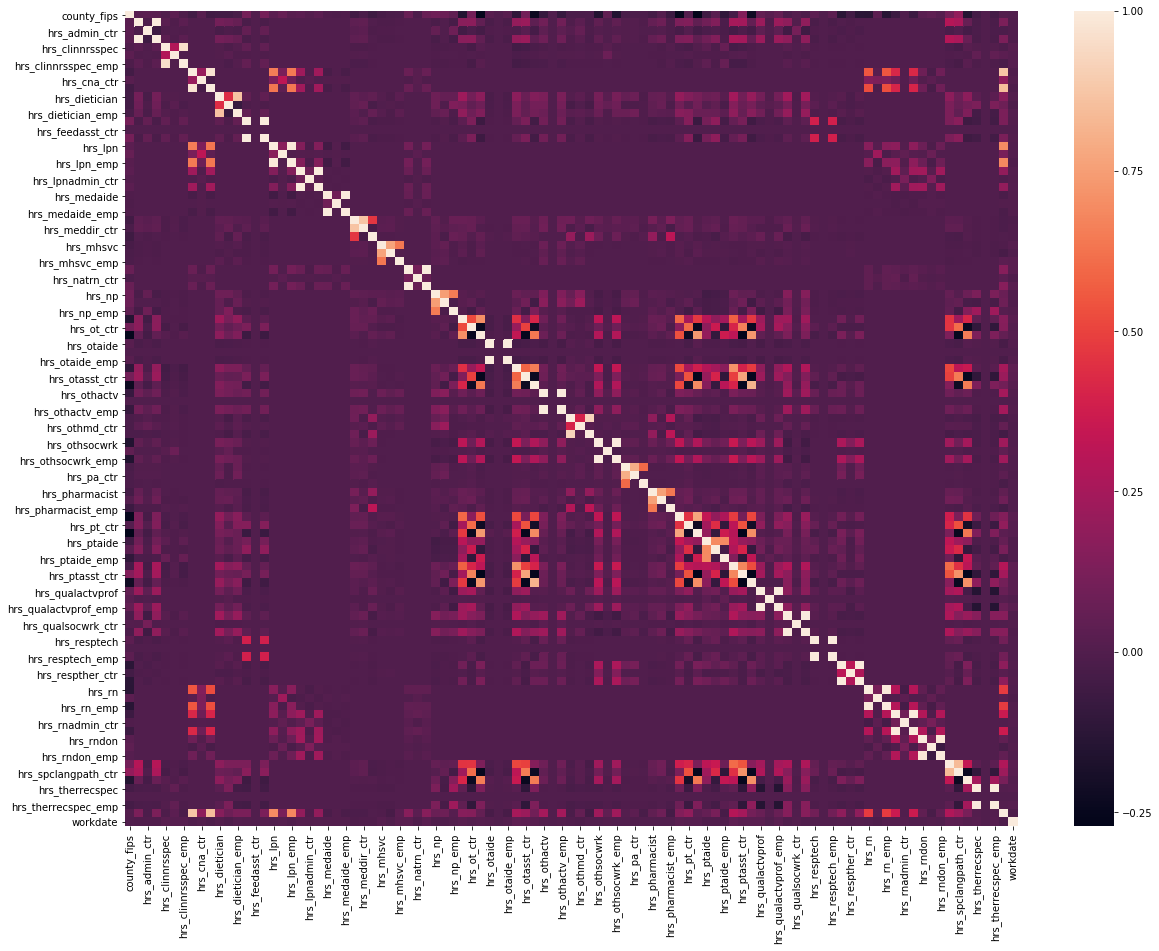

In [52]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr1)

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.
- For example,hrs_rn, hrs_rn_emp, hrs_pharmacist_emp, hrs_otaide_emp, etc. are highly negatively correlated with the feature called county_fips.
- Some features like hrs_lpn, hrs_np, hrs_admin_ctr and hrs_rndon, etc. are highly positively correlated with the county_fips.

In [83]:
X = df_payroll.drop(['mdscensus'], axis=1)

y = df_payroll['mdscensus']

# Split data into separate training and test set

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [85]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((205782, 105), (88193, 105))

 Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables in training set separately.

Display categorical variables in training set

In [86]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['city',
 'county_name',
 'cy_qtr',
 'provname',
 'provnum',
 'state',
 'day_of_week']

Display numerical variables in training set

In [87]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['county_fips',
 'hrs_admin',
 'hrs_admin_ctr',
 'hrs_admin_emp',
 'hrs_clinnrsspec',
 'hrs_clinnrsspec_ctr',
 'hrs_clinnrsspec_emp',
 'hrs_cna',
 'hrs_cna_ctr',
 'hrs_cna_emp',
 'hrs_dietician',
 'hrs_dietician_ctr',
 'hrs_dietician_emp',
 'hrs_feedasst',
 'hrs_feedasst_ctr',
 'hrs_feedasst_emp',
 'hrs_lpn',
 'hrs_lpn_ctr',
 'hrs_lpn_emp',
 'hrs_lpnadmin',
 'hrs_lpnadmin_ctr',
 'hrs_lpnadmin_emp',
 'hrs_medaide',
 'hrs_medaide_ctr',
 'hrs_medaide_emp',
 'hrs_meddir',
 'hrs_meddir_ctr',
 'hrs_meddir_emp',
 'hrs_mhsvc',
 'hrs_mhsvc_ctr',
 'hrs_mhsvc_emp',
 'hrs_natrn',
 'hrs_natrn_ctr',
 'hrs_natrn_emp',
 'hrs_np',
 'hrs_np_ctr',
 'hrs_np_emp',
 'hrs_ot',
 'hrs_ot_ctr',
 'hrs_ot_emp',
 'hrs_otaide',
 'hrs_otaide_ctr',
 'hrs_otaide_emp',
 'hrs_otasst',
 'hrs_otasst_ctr',
 'hrs_otasst_emp',
 'hrs_othactv',
 'hrs_othactv_ctr',
 'hrs_othactv_emp',
 'hrs_othmd',
 'hrs_othmd_ctr',
 'hrs_othmd_emp',
 'hrs_othsocwrk',
 'hrs_othsocwrk_ctr',
 'hrs_othsocwrk_emp',
 'hrs_pa',
 'hrs_pa_ctr',
 'hrs_p

Engineering missing values in categorical variables

In [88]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

city           0.0
county_name    0.0
cy_qtr         0.0
provname       0.0
provnum        0.0
state          0.0
day_of_week    0.0
dtype: float64

In [89]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [90]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['city'].fillna(X_train['city'].mode()[0], inplace=True)
    df2['state'].fillna(X_train['state'].mode()[0], inplace=True)
    df2['county_name'].fillna(X_train['county_name'].mode()[0], inplace=True)   
    df2['cy_qtr'].fillna(X_train['cy_qtr'].mode()[0], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [91]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

city           0
county_name    0
cy_qtr         0
provname       0
provnum        0
state          0
day_of_week    0
dtype: int64

In [92]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

city           0
county_name    0
cy_qtr         0
provname       0
provnum        0
state          0
day_of_week    0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [93]:
# check missing values in X_train

X_train.isnull().sum()

city                    0
county_fips             0
county_name             0
cy_qtr                  0
hrs_admin               0
hrs_admin_ctr           0
hrs_admin_emp           0
hrs_clinnrsspec         0
hrs_clinnrsspec_ctr     0
hrs_clinnrsspec_emp     0
hrs_cna                 0
hrs_cna_ctr             0
hrs_cna_emp             0
hrs_dietician           0
hrs_dietician_ctr       0
hrs_dietician_emp       0
hrs_feedasst            0
hrs_feedasst_ctr        0
hrs_feedasst_emp        0
hrs_lpn                 0
hrs_lpn_ctr             0
hrs_lpn_emp             0
hrs_lpnadmin            0
hrs_lpnadmin_ctr        0
hrs_lpnadmin_emp        0
hrs_medaide             0
hrs_medaide_ctr         0
hrs_medaide_emp         0
hrs_meddir              0
hrs_meddir_ctr          0
                       ..
hrs_qualactvprof_emp    0
hrs_qualsocwrk          0
hrs_qualsocwrk_ctr      0
hrs_qualsocwrk_emp      0
hrs_resptech            0
hrs_resptech_ctr        0
hrs_resptech_emp        0
hrs_respther

In [94]:
# check missing values in X_test

X_test.isnull().sum()

city                    0
county_fips             0
county_name             0
cy_qtr                  0
hrs_admin               0
hrs_admin_ctr           0
hrs_admin_emp           0
hrs_clinnrsspec         0
hrs_clinnrsspec_ctr     0
hrs_clinnrsspec_emp     0
hrs_cna                 0
hrs_cna_ctr             0
hrs_cna_emp             0
hrs_dietician           0
hrs_dietician_ctr       0
hrs_dietician_emp       0
hrs_feedasst            0
hrs_feedasst_ctr        0
hrs_feedasst_emp        0
hrs_lpn                 0
hrs_lpn_ctr             0
hrs_lpn_emp             0
hrs_lpnadmin            0
hrs_lpnadmin_ctr        0
hrs_lpnadmin_emp        0
hrs_medaide             0
hrs_medaide_ctr         0
hrs_medaide_emp         0
hrs_meddir              0
hrs_meddir_ctr          0
                       ..
hrs_qualactvprof_emp    0
hrs_qualsocwrk          0
hrs_qualsocwrk_ctr      0
hrs_qualsocwrk_emp      0
hrs_resptech            0
hrs_resptech_ctr        0
hrs_resptech_emp        0
hrs_respther

In [95]:
X_train=X_train.fillna(0)

In [96]:
X_test=X_test.fillna(0)

# Encode categorical variables

In [97]:
# preview categorical variables in X_train

X_train[categorical].head()

,city,county_name,cy_qtr,provname,provnum,state,day_of_week
192008,LAUDERHILL,Broward,2020Q3,NSPIRE HEALTHCARE LAUDERHILL,105680,FL,Thursday
31844,MESA,Maricopa,2020Q3,ADVANCED HEALTHCARE OF MESA,35266,AZ,Thursday
163945,GULFPORT,Pinellas,2020Q3,BOCA CIEGA CENTER,105271,FL,Thursday
52663,HOT SPRINGS,Garland,2020Q3,"BELVEDERE NURSING AND REHABILITATION CENTER, LLC",45463,AR,Thursday
179191,HIALEAH,Miami-Dade,2020Q3,SUSANNA WESLEY HEALTH CENTER,105498,FL,Thursday


In [98]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
import category_encoders as ce

In [100]:
# encode categorical variables with one-hot encoding


encoder = ce.OneHotEncoder(cols=['city', 'county_name', 'provname', 'provnum', 'state','cy_qtr'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

MemoryError: 

In [72]:
X_train.head()

,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,...,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12,state_13,workdate
192008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20200705.0
31844,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20200713.0
163945,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20200702.0
52663,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20200809.0
179191,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20200906.0


In [73]:
X_train.shape

(205782, 7383)

In [74]:
X_test.head()

,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,...,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12,state_13,workdate
126749,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,20200904.0
195866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20200929.0
234145,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,20200706.0
149688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,20200705.0
254866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,20200727.0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. We will do it as follows.
We should find out most and least important feauture by visualizing feature scores of the features.
after we should build the model like Random Forest and Logostic Regression on selected features(I will drop least important feature which I found from my selected features plot.

In the next step I will create cinfusion matrix to check classification report and accuracy.
Which algorithms should we selected? checking several algorithms using cross validation(K_fold_cross_validation) selecting one odel with highest value of metrics.
In all my projects I compare all my features by their Precision and Recall and F1-score and choose the algorithm with high accuracy and low rate of false positive and false negative.

ROC Curve is a good idea to represent trade off between True positive and False Positive Rate.

# Results and Conclusion before involving machine learning algorithms

the dataset size is larger than the memory available to train a model.In furthur analysis I should Hadoop or Spark.
- Build an ensemble: Split the dataset randomly and train several base learners on each part, then combine these to get the final prediction. This would most effectively make use of the large dataset and produce a more accurate model. But you need to spend more time to carefully build the ensemble and keep clear of the usual pitfalls of ensemble building.
- Evaluate multiple different algorithms on the time taken to train them for your specific dataset vs. their accuracy, precision and Recall.
- Model saturation also comes into play with cross-validation. I would choose K-fold cross validation for evaluation the models.
- Machine Learning algorithms suitable for huge big data could be:
  - Linear Regression
  - Logistic Regression
  - Random Forest
  - XGBoost
  - Decision Tree
  - KNN



- To improve their staffing they should increase the total hours for the administrator, medical director, feeding assistant, and occupational therapy aide in their facility.
- As we can see in one of our plot FL has the most resident and for further analysis, we can see the correlation between cities and total hours of nursing staffing and non_nursing staffing.
- We can compare the Calendar quarter with total hours and cities in the FL for getting the better result to provide more information on why FL has more residents in their nursing_home.


# Feature Scaling 

In [75]:
cols = X_train.columns

In [77]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

MemoryError: 

In [78]:
X_train = pd.DataFrame(X_train, columns=[cols])

NameError: name 'X_train' is not defined

In [77]:
X_test = pd.DataFrame(X_test, columns=[cols])

We now have X_train dataset ready to be fed into the Random Forest classifier. We will do it as follows.

# Random Forest Classifier model with default parameters

In [77]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train[:1000],y_train[:1000]) 



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

NameError: name 'X_train' is not defined

Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

 I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# Random Forest Classifier model with 100 Decision Trees

In [96]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train[:1000], y_train[:1000])



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


# Confusion matrix 

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

# Classification Report 

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

# Conclusion

Insufficient nursing staff can negatively impact all residents in a nursing home. Numerous studies of nursing homes reveal a strong positive relationship between the number of nursing home staff who provide direct care to residents daily basis and the quality of care and quality of life of residents.

On the whole, higher nurse staffing improves both the process and outcome measures of nursing home quality. The impact of registered nurses (RNs) is particularly positive, but total nursing staff including licensed vocational nurses or licensed practical nurses (LVNs/LPNs) and certified nursing assistants (CNAs) is also important.

 Higher RN staffing levels are associated with better resident care quality in terms of fewer pressure ulcers; lower restraint use; decreased infections; lower pain; improved activities of daily living (ADLs) independence; less weight loss, dehydration, and insufficient morning care; less improper and overuse of antipsychotics; and lower mortality rates.

To improve their staffing they should increase the total hours for the administrator, medical director, feeding assistant, and occupational therapy aide in their facility.
As we can see in one of our plot in this case study FL has the most resident and for further analysis, we can see the correlation between cities and total hours of nursing staffing and non_nursing staffing. Based on the total hours of RN, CNA, LPN,etc. we can realize the number of nurse and non_nurse staffing at nursing home and then decide to increase some staff for getting better result at Nursing home. 

We can compare the Calendar quarter with total hours and cities in the FL for getting the better result to provide more information on why FL has more residents in their nursing_home.

The strongest relationships are found between higher nurse staffing levels and residents. If they hire more sufficient staffing like RN, CNA, LPN, MDS, Feeding Assistant and increase their total hours, they can provide high quality of care and environment for all eldery people.


 - Based on the chart in state AL percentage of the average total hour of Feeding assistant is more than in other states.
 - In general, the state Al average total of hours of feeding assistant and nurse practitioner is more than other states.
 - In the state, FL's percentage average total of hours of Register nurse and CNA are more than others.
 - In the CA, percentage average total of hours of LPN(Licensed practical nurse) is more than others.
  
    - The bar chart reported %70 lower NP staffing in AZ, the nursing home in AZ should increase the total of hours for NP by %70, increase the total of hours for CNA by %25, increase the total of hours for RN by %27 and increase the total of hours for LPN by %21.

    - I compared the percentage average total of hours for LPN, RN, CNA in the AZ with AL, FL, and CA. I also compared the percentage average total of hours for NP in AZ with AL.

    

# FUTURE ENHANCEMENTS

 -  we can compare all this staffing by the total hours of working on weekdays and weekends.
 -  we can figure out what was the reason in some day staffing didn't work at all. what was the issues? Is that related to Covid-19?because some nursing home in California has affected by Covid-19 and that had %25 lower RN staffing levels than homes without non_Covid-19 residents. Lower staffing levels in facilities before the pandemic made these facilities more vulnerable to the coronavirus, resulting in more than 28 000 U.S. nursing home resident and worker deaths by May 11, 2020.
     
